# Week3授業前課題2 住宅情報の分析
# このテキストについて
## テキストの目的
* データ分析の基本的な流れを知る
* データ分析ライブラリのPandasに慣れる
* Kaggleのカーネルを利用する
## どのように学ぶか
定番のデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

# エイムズ市の住宅価格
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。
住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。
エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。
Ames, Iowa - Wikipedia : https://en.wikipedia.org/wiki/Ames,_Iowa

# Kaggleのカーネル
Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。
これ以降Kaggleを利用していきますので、アカウントを作成してください。

### 《参考カーネル》

Comprehensive data exploration with Python | Kaggle https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
（まずはここから）

House Prices : EDA to ML (Beginner) | Kaggle https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner

A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos

# データセットの準備
データセットはKaggleからダウンロードします。

House Prices: Advanced Regression Techniques | Kaggle https://www.kaggle.com/c/house-prices-advanced-regression-techniques

上記URLを開き、Dataのページへ移動してください。                 
この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。


# 【問題１】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# missinnoのインストール
#!pip install missingno

In [2]:
df = pd.read_csv('C:/Users/miyas/kaggle/train.csv')

# 【問題2】データセット自体の調査
* SalePriceが目的変数で，これを予測する．
* 説明変数には，屋根の種類やキッチン，寝室の数，駅までの距離などがある

# データの概観

# 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

* 各特徴量がどういったものかを見る。（数値データか文字データなど）
* 今回の目的変数はどの列か確認する。
* 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

* 目的変数は80列目にあるSalePrice
* 特徴量はfloat型が３つ，int型が35個，オブジェクト型が43個ある
* 欠損値あり

In [4]:
pd.set_option('display.max_columns', None)#すべてのカラムを表示
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

* 各特徴量の欠損値の有無を確認する。
* 欠損値の確認には**missingno**というライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: https://github.com/ResidentMario/missingno

* 欠損値が何パーセント含まれるかを確認する。

In [10]:
# 欠損割合の確認
pd.DataFrame(df.isnull().sum()/1460).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


ほとんどが欠損の列がある．Alley，PoolQC，Fence，MiscFeatureとか．             
目的変数似は欠損なし．

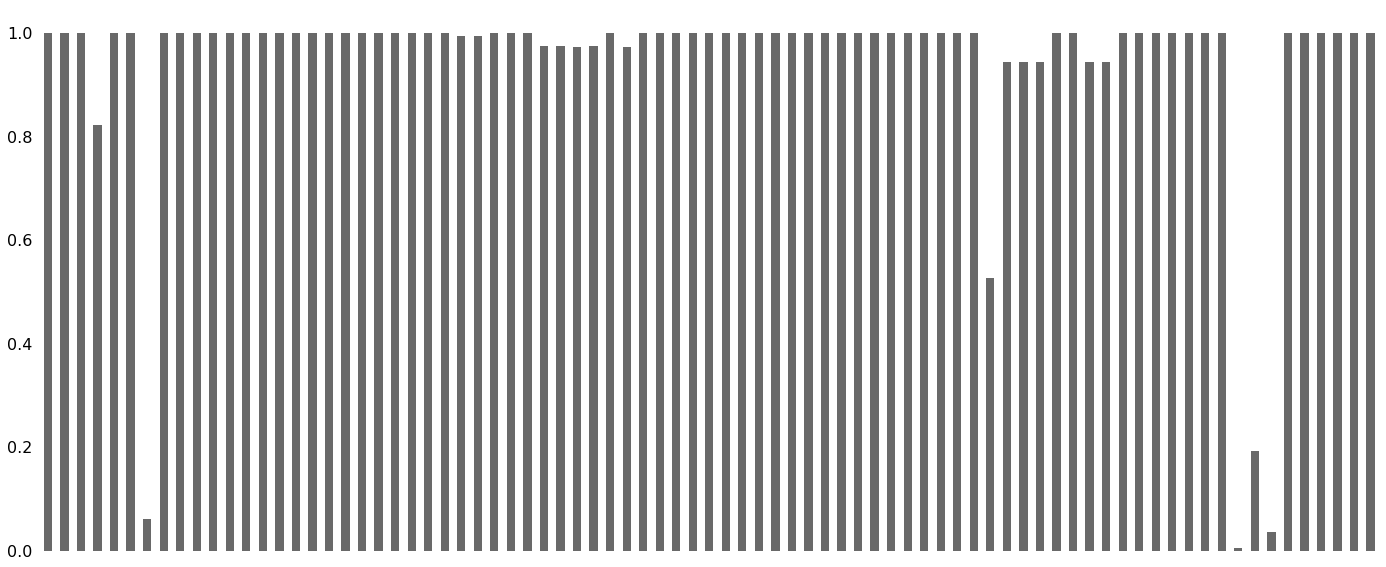

In [9]:
# 欠損値の可視化
# missingnoのインポート
import missingno as msno
msno.bar(df)

カラム名が表示されない．．．

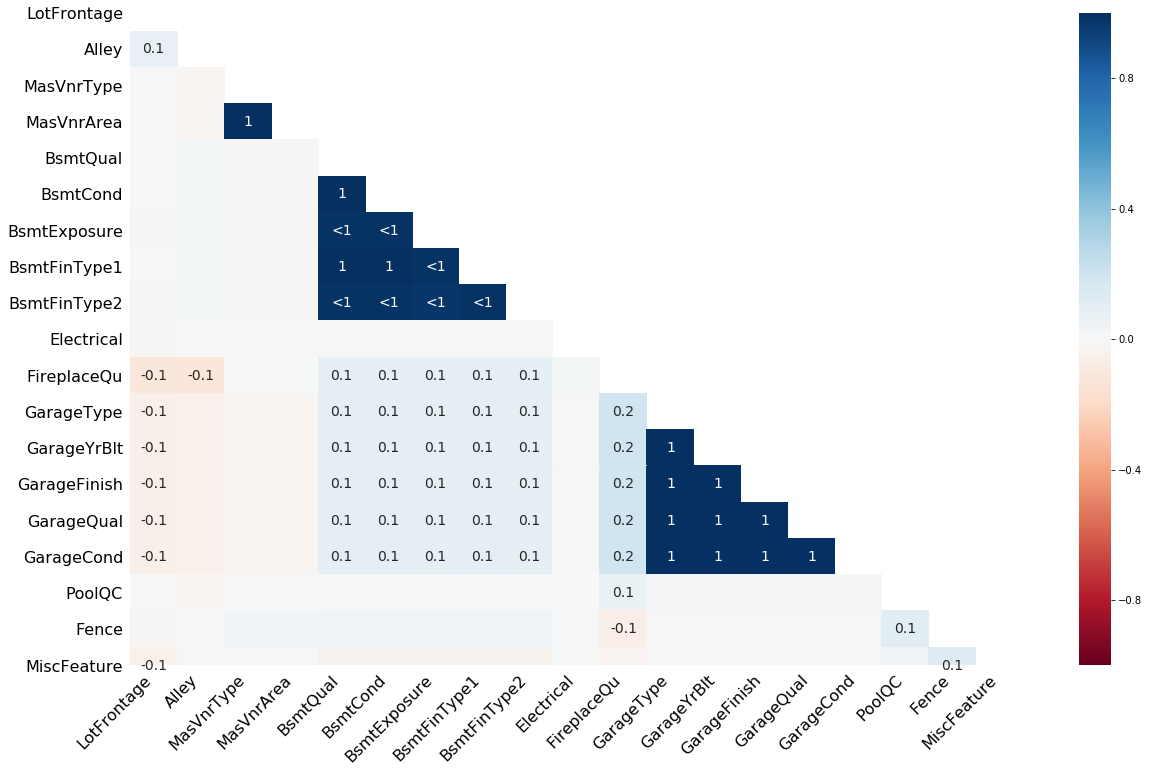

In [8]:
msno.heatmap(df)

欠損値の数の相関．全く同じ数の欠損を持つ特徴量がある．BsmtQualとBsmtFintype1とか

In [11]:
# 5つ以上欠損値がある特徴量を削除
df2 = df.dropna(thresh=1455,axis=1)

In [12]:
# 欠損値がある行の削除
df2 = df2.dropna(how='any')

# 【問題5】用語の調査
## 尖度（せんど）
* 分布が**正規分布からどれだけ尖っているか**を表す統計量．
* 山の尖り度と裾の広がり度を示す．
* 正規分布より**尖った分布**（データが平均付近に集中し,分布の裾が重い）のときには**正の値**をとる．
* 正規分布より**扁平な分布**（データが平均付近から散らばり,分布の裾が軽い）のときには**負の値**をとる．
* **正規分布の場合には0**になる．
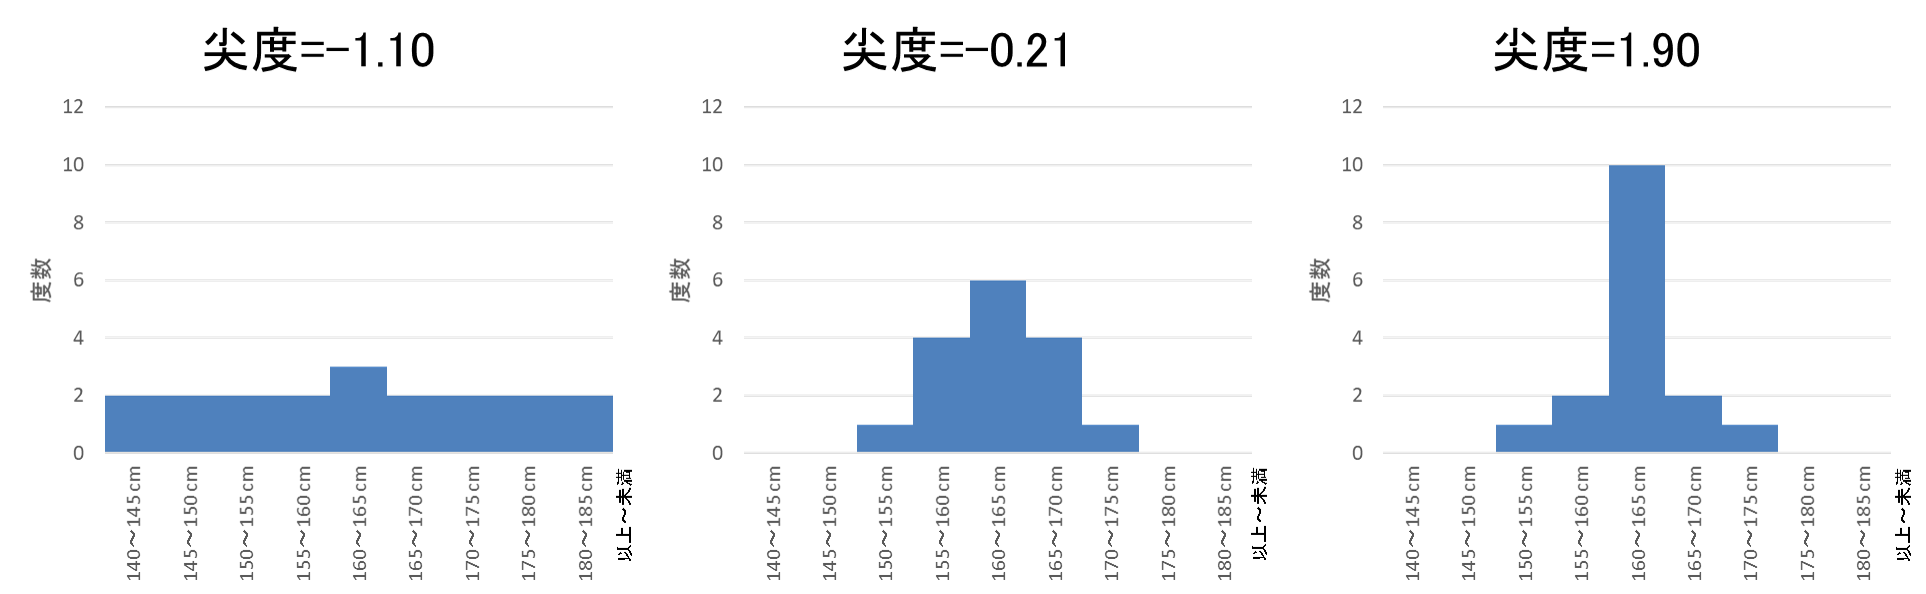

## 歪度（わいど）
* 分布が**正規分布からどれだけ歪んでいるか**を表す統計量で，**左右対称性**を示す指標のこと．
* 「右裾が長い」「右に歪んだ」「左に偏った」分布のときには正の値をとる．
* 「左裾が長い」「左に歪んだ」「右に偏った」分布のときには負の値をとる．
* **左右対称の分布**（例えば正規分布）の場合には**0**になる．
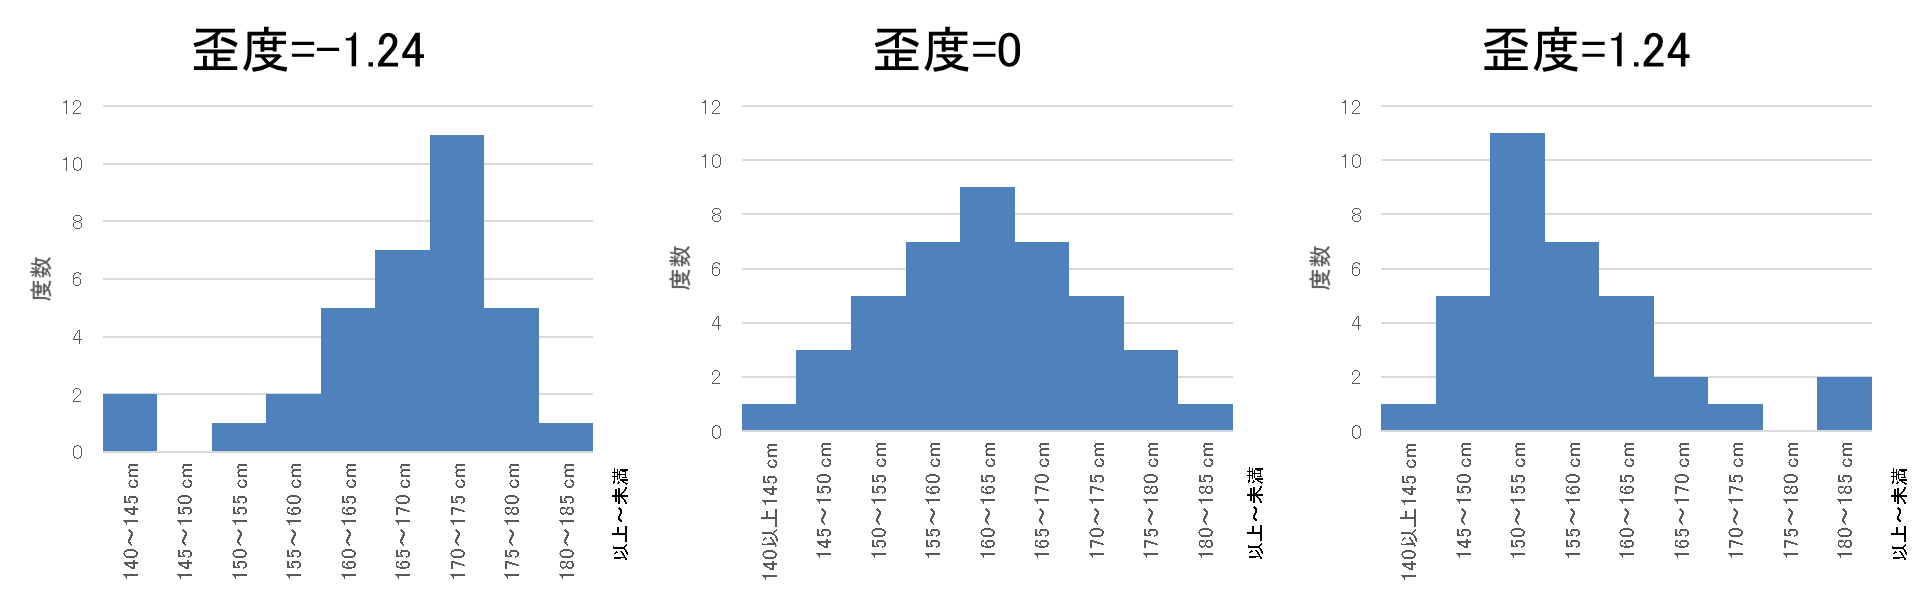
> https://bellcurve.jp/statistics/course/17950.html

# 【問題6】分布の確認
* seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
* 目的変数に対して対数変換を行う。
* 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

seaborn.distplot — https://seaborn.pydata.org/generated/seaborn.distplot.html

## sns.distplot()を使い,目的変数の分布を表示し,尖度と歪度も算出

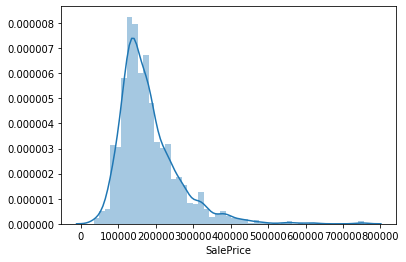

In [15]:
sns.distplot(df2.SalePrice)

In [16]:
print('歪度（Skewness）：',df2.SalePrice.skew())
print('尖度（Kurtosis）：',df2.SalePrice.kurt())

歪度（Skewness）： 1.8819429948035529
尖度（Kurtosis）： 6.529263049673958


## 目的変数を対数変換

In [17]:
# 底をeとして対数変換
SalePrice_log = np.log(df2.SalePrice)

## 対数変換したものに対して分布を表示し，尖度と歪度を算出

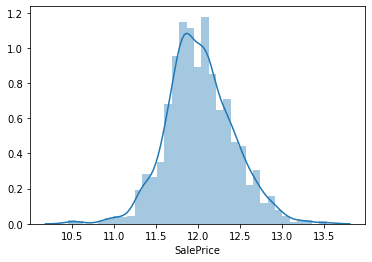

In [18]:
sns.distplot(SalePrice_log)

In [19]:
print('歪度（Skewness）：',SalePrice_log.skew())
print('尖度（Kurtosis）：',SalePrice_log.kurt())

歪度（Skewness）： 0.12131775882415026
尖度（Kurtosis）： 0.806927847502148


対数変換したことによって，目的変数が正規分布に近くなった．

# 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

* 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
* 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
* 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
* 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。                         


**《補足》**                          
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

## 相関行列のヒートマップ

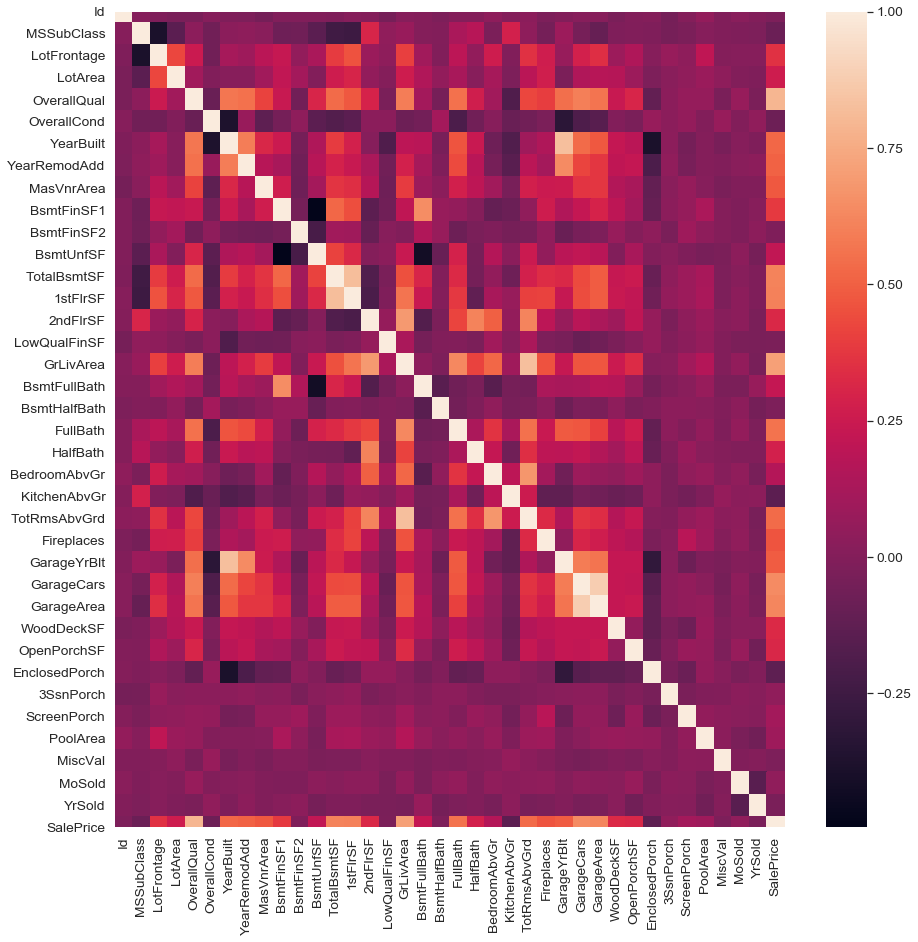

In [43]:
corr_mat = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat)

## 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る

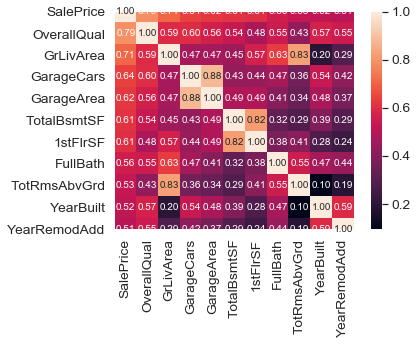

In [44]:
#saleprice correlation matrix
k = 11 #取り出したい数．今回は上位10個
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index# df.nlargestで，dfの上から上位ｋをとってこれる
cm = np.corrcoef(df[cols].values.T)#cols名のdfをnumpy配列に変えて，相関係数を計算
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [45]:
# df.nlargest(k, '値を見たい列')
corr_mat.nlargest(k, 'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.131881,-0.020891,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,0.588920,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.179189,-0.024536,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.564567,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,0.288886,0.323722,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.484557,0.469672,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,0.250647,0.285573,0.409516,0.616423,0.131185,0.825489,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.148112,0.362289,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398

In [46]:
corr_mat.nlargest(k, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

## 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる
* OverallQual : 全体的な素材と仕上げの品質
* GrLivArea   : 地上のリビングエリアの平方(フィート)
* GarageCars  : 車の容量のガレージのサイズ
* GarageArea  : ガレージのサイズ（平方フィート）
* TotalBsmtSF : 地下面積の総平方フィート
* 1stFlrSF    : 1階平方フィート
* FullBath    : グレード以上のフルバスルーム
* TotRmsAbvGrd: グレード以上の部屋の合計（バスルームは含まれません）
* YearBuilt   : 元の建設日
* YearRemodAdd: 改造日

## 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

In [60]:
corr10 = df[cols].drop('SalePrice',axis=1)
corr10_mat = corr10.corr()
corr10_mat

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


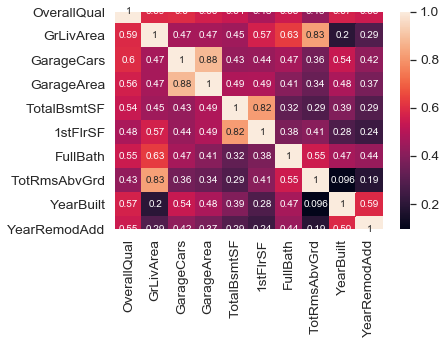

In [74]:
sns.heatmap(corr10_mat,annot=True,annot_kws={'size': 10})

In [75]:
corr10_mat[cor10_mat>=0.7]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.825489,NaN,NaN
GarageCars,NaN,NaN,1.000000,0.882475,NaN,NaN,NaN,NaN,NaN,NaN
GarageArea,NaN,NaN,0.882475,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,1.00000,0.81953,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,0.81953,1.00000,NaN,NaN,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
TotRmsAbvGrd,NaN,0.825489,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


* GarageAreaとGarageCars＝0.882475　　この2つはどちらもガレージのサイズ
* GrLivAreaとTotRmsAbvGrd＝0.825489　 リビングの広さと部屋の数だから相関があるのかも
* TotalBsmtSFと1stFlrSF＝0.81953　　　1階の広さと地下面積は相関あり